In [19]:
from gymnasium import Env
from gymnasium.spaces import Box
from typing import Any, SupportsFloat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import random
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('data/HOLLISTR_1_N101.csv')
df = df[['INTERVALSTARTTIME_GMT', 'MW', 'LMP_TYPE']]
df = df[df['LMP_TYPE'] == 'LMP']
df.drop(columns=['LMP_TYPE'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.columns = ['dt', 'MW']
df['dt'] = pd.to_datetime(df['dt'].str.slice(0, -6).str.replace('T', ' '))
# df['date'] = df['dt'].dt.date
# df['time'] =  df['dt'].dt.hour * 12 + df['dt'].dt.minute // 5
# df.drop(columns=['dt'], inplace=True)
df

,dt,MW
0,2022-03-20 00:00:00,144.25465
1,2022-03-20 00:05:00,135.43588
2,2022-03-20 00:10:00,138.42427
3,2022-03-20 00:15:00,179.78500
4,2022-03-20 00:20:00,180.75333
...,...,...
105115,2023-03-19 23:35:00,55.79147
105116,2023-03-19 23:40:00,56.35817
105117,2023-03-19 23:45:00,61.58179
105118,2023-03-19 23:50:00,65.80003


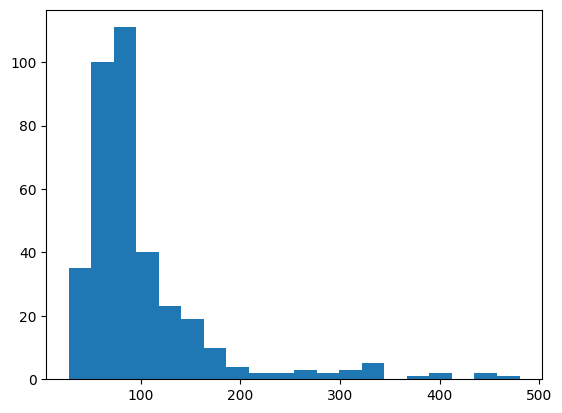

In [39]:
plt.hist(df.groupby(df['dt'].dt.date)['MW'].mean(), bins=20);

In [41]:
np.mean(df.groupby(df['dt'].dt.date)['MW'].min() < 0)

0.27123287671232876

In [34]:
def score_sample(df, n, len, order):
    model = SARIMAX(df.iloc[:n], order=order)
    model = model.fit(full_output=False, disp=False)
    pred = model.forecast(len).values
    return np.mean(np.abs((df.iloc[n:n+len]['MW'] - pred)))

def score(df, order, num):
    pred_len = 200
    n = np.random.randint(10000, len(df)-pred_len, num)
    return [score_sample(df, n[i], pred_len, order) for i in tqdm(range(num))]

In [37]:
scores = score(df.set_index('dt'), (5, 1, 1), 20)
np.mean(scores), np.std(scores)

  0%|          | 0/20 [00:00<?, ?it/s]

(25.869227096378097, 17.764433703530095)

In [29]:
scores = score(df.set_index('dt'), (6, 1, 1))
np.mean(scores), np.std(scores)

  0%|          | 0/20 [00:00<?, ?it/s]

(32.28408227036833, 27.18845168823339)

In [28]:
scores = score(df.set_index('dt'), (7, 1, 1))
np.mean(scores), np.std(scores)

  0%|          | 0/20 [00:00<?, ?it/s]

(24.331725020201286, 14.849668062421166)

In [31]:
scores = score(df.set_index('dt'), (8, 1, 1))
np.mean(scores), np.std(scores)

  0%|          | 0/20 [00:00<?, ?it/s]

(23.638493167180737, 19.256230139600326)